## Python statistics essential training - 03_07_proportions

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [ ]:
#from previous exercise

In [4]:
smoking = pd.read_csv('whickham.csv')

In [5]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [6]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [7]:
smoking

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,0-30
1,Alive,Yes,18,0-30
2,Dead,Yes,71,NaN
3,Alive,No,67,NaN
4,Alive,No,64,53-64
...,...,...,...,...
1309,Alive,Yes,35,30-40
1310,Alive,No,33,30-40
1311,Alive,Yes,21,0-30
1312,Alive,No,46,40-53


In [8]:
#group outcome (dead or alive) by smoker (yes/no)
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [9]:
#group outcome (dead or alive) by smoker (yes/no) and age group (binned age group)
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [10]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [11]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

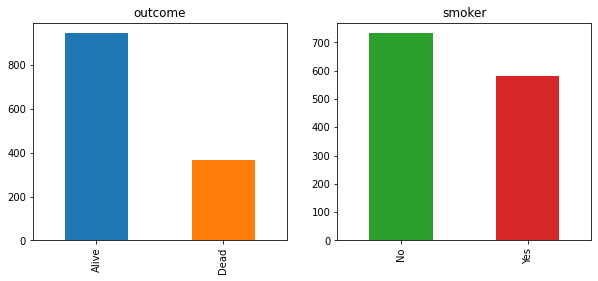

In [13]:
pp.figure(figsize=(10,4))

#first plot is bar plot of outcome (value percentage of dead or alive)
pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='bar',color=['C0','C1'])
pp.title('outcome')

#second plot is bar plot of smoker (value percentage of yes or no)
pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='bar',color=['C2','C3'])
pp.title('smoker')

Text(0.5, 1.0, 'smoker')

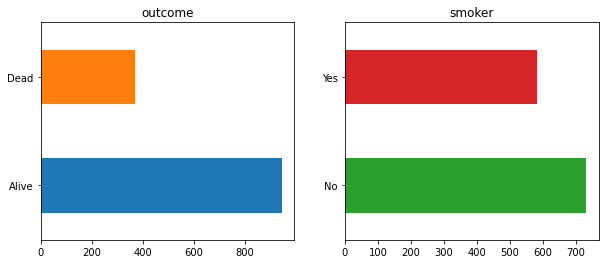

In [14]:
#you can also view as horizontal bar charts using 'barh'

pp.figure(figsize=(10,4))
pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='barh',color=['C0','C1'])
pp.title('outcome')

pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='barh',color=['C2','C3'])
pp.title('smoker')

Text(0.5, 1.0, 'smoker')

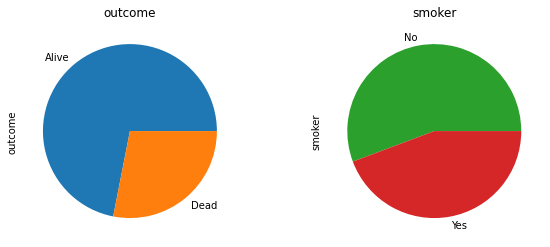

In [15]:
#we can also do pie charts: kind = 'pie', color -> colors

pp.figure(figsize=(10,4))
pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1'])
pp.title('outcome')

pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3'])
pp.title('smoker')

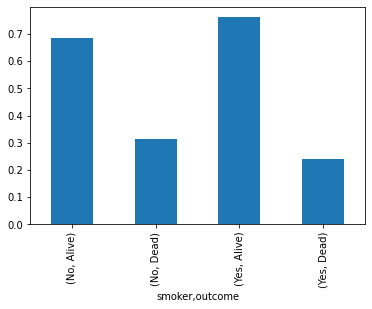

In [16]:
#we can show outcome by smoker status -- group outcome (dead or alive) by smoker (yes/no)
bysmoker.plot(kind='bar')

The way the labels are setup represents the multi-index of the smoker object. We get a better result if we unstack it first

In [22]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


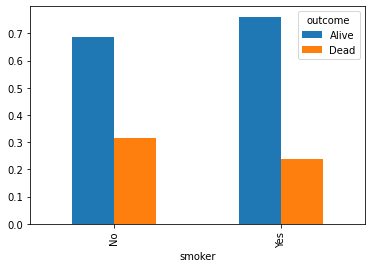

In [25]:
bysmoker.unstack().plot(kind='bar')

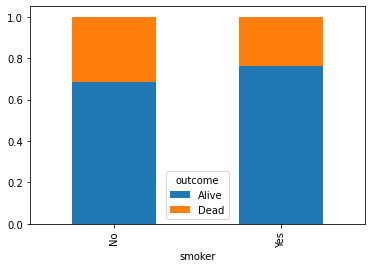

In [26]:
bysmoker.unstack().plot(kind='bar',stacked=True)

In [28]:
#we can now try breaking outcome by smoker by age group
#this was represented in the the byage dataframe
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

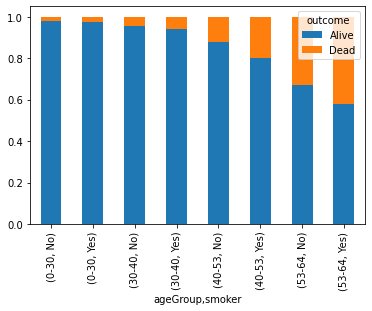

In [29]:
byage.unstack().plot(kind='bar',stacked=True)

It would be nicer to group the smoker and non-smoker bars for age group so that we have a direct visual comparison

We can sacrifice keeping both the dead and alive fractions since they always sum to one and then use the columns for the smoker status. We can drop the column dead 

In [12]:
byage.unstack().drop("Dead",axis=1).unstack() #drop the dead column

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [13]:
#the labels of the columns are somewhat messy, 
#so we will restructure them 
byage2 = byage.unstack().drop("Dead",axis=1).unstack()
byage2.columns = ["No","Yes"]
byage2.columns.name = "smoker"

In [14]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


this dataframe shows the alive percent by smoker and ageGroup

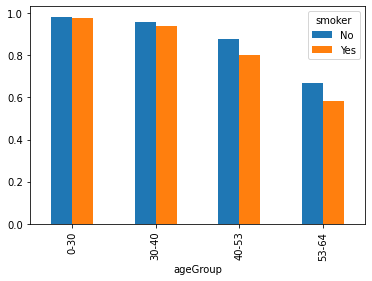

In [15]:
#this is much cleaner and ready to plot
byage2.plot(kind='bar')

Simpson's paradox shows that at every age-group, non-smokers have a slight edge in outcome (alive) than smokers. This indicates how not taking account age, it would seem that smokers outlive non-smokers.